### **Esto es un adelanto para el proyecto final.**

El proyecto final es aplicar el método de metrópolis a una distribución de datos.

Si se tienen muchos datos, el likelihood más común a utilizar es con distribución Gaussiana. Pero si son pocos datos, es recomendable utilizar un likelihood con distribución de Poisson.

Intentaremos ajustar un modelo de pocos puntos utilizando un likelihood con distribución de Poisson. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.special import factorial

Ahora, pensemos en una distribución de frecuencias para ciertos intervalos de energía. 

Tenemos un conjunto de datos de tamaño $N = \sum^M_{j=1}y_j$, con una distribución de probabilidad $p(x) = ax + b$, con $p(x) = 0$ fuera de los límites de $x$. Queremos estimar $a$ y $b$. 

Este conjunto de datos se ve así:

In [9]:
x = np.linspace(0, 20, 21)
y_old = 3*x + 2
y = 3*x + 2

error = np.random.randint(0,2, size = 21)
yerror = []

for i in range(15):
    y[i] = y[i] + error[i]
    yerror.append(0.2)

In [17]:
y = np.array(y)
x = np.array(x)
y

array([ 2.,  5.,  9., 11., 15., 18., 20., 23., 27., 30., 33., 35., 38.,
       42., 45., 47., 50., 53., 56., 59., 62.])

Text(0, 0.5, 'p(x)')

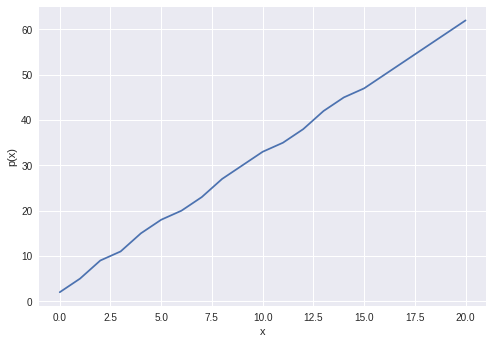

In [13]:
plt.style.use('seaborn')

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('p(x)')

In [14]:
factorial(y, exact = True)

array([2, 120.0, 362880.0, 39916800.0, 1307674368000.0,
       6402373705728000.0, 2.43290200817664e+18, 2.585201673888498e+22,
       1.0888869450418352e+28, 2.6525285981219107e+32,
       8.683317618811887e+36, 1.0333147966386145e+40,
       5.230226174666011e+44, 1.40500611775288e+51,
       1.1962222086548019e+56, 2.5862324151116818e+59,
       3.0414093201713376e+64, 4.2748832840600255e+69,
       7.109985878048635e+74, 1.3868311854568984e+80,
       3.146997326038794e+85], dtype=object)

---------------------------------------------------------

Cuando no se tienen muchos datos. el likelihood para cada $y_i$ debe ser modelada utilizando la distribución de Poisson: 

$p(k|\mu_i) = \mu_i^kexp(-\mu_i)/k!$, donde $k = y_i$ y $\mu_i = a*x_i + b$.

Con priors uniformes para $a$ y $b$,

$L = constante + \sum^M_{i=1}[y_iln(a*x_i+b*)-a*x_i-b]$

Definimos ahora nuestro modelo y nuestro likelihood:

In [40]:
def modelo(theta, x):
    return theta[0]*x + theta[1]

def likelihood(theta, data): # Función que calcula el likelihood
    equis = data[0] # Llamamos x al primer conjunto de datos
    ye = data[1] # Llamamos y al segundo conjunto de datos
    model = modelo(theta,equis) # Calculamos el modelo utilizando la función modelo
    likelihood = ye*np.log(model)-model-np.log(factorial(ye))  # Obtenemos L
    return likelihood.sum() # Regresamos la suma de todos los L

Intentamos con un solo camino.

In [47]:
rango = 5000

a0 = 4
b0 = 1
lnlike0 = -likelihood([a0, b0], [x,y])

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = -likelihood([a_new, b_new], [x,y])
    if like>lnlike0:
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif lnlike0-like<-math.log(random.uniform(0,1)):
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)

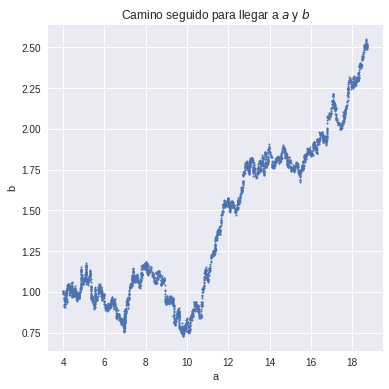

In [48]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')

(array([487., 406., 415., 369., 331., 320., 343., 300., 335., 307.]),
 array([ 3.99485248,  5.46983503,  6.94481759,  8.41980015,  9.8947827 ,
        11.36976526, 12.84474781, 14.31973037, 15.79471293, 17.26969548,
        18.74467804]),
 <a list of 10 Patch objects>)

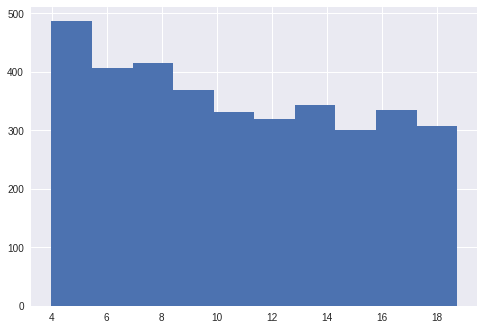

In [50]:
plt.hist(a_sample)

(array([ 543., 1084.,  377.,   70.,  208.,  553.,  379.,  167.,  143.,
          89.]),
 array([0.7290056 , 0.91097234, 1.09293908, 1.27490582, 1.45687256,
        1.6388393 , 1.82080604, 2.00277277, 2.18473951, 2.36670625,
        2.54867299]),
 <a list of 10 Patch objects>)

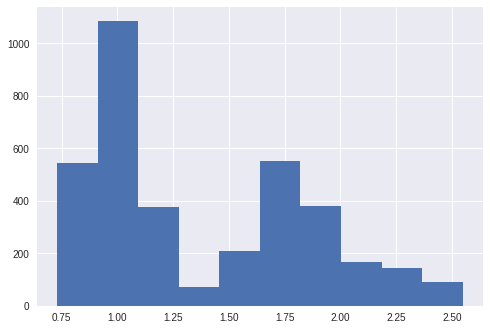

In [51]:
plt.hist(b_sample)

-------------------------------------------

Observamos que el modelo no converge a algún valor, así que ahora usamos la siguiente opción:

In [52]:
def modelo(theta, x):
    return theta[0]*x + theta[1]

def likelihood(theta, data): # Función que calcula el likelihood
    equis = data[0] # Llamamos x al primer conjunto de datos
    ye = data[1] # Llamamos y al segundo conjunto de datos
    model = modelo(theta,equis) # Calculamos el modelo utilizando la función modelo
    likelihood = (model**y)*np.exp(-1*(model))/factorial(ye)  # Obtenemos L
    return likelihood.prod() # Regresamos la suma de todos los L

In [55]:
rango = 40000

a0 = 7
b0 = 1.5
lnlike0 = likelihood([a0, b0], [x,y])

a_sample = [a0]
b_sample = [b0]

sigma = 0.01

for j in range(1,rango):
    a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
    b_new = np.random.normal(b_sample[len(a_sample)-1], sigma)
    like = likelihood([a_new, b_new], [x,y])
    if like>lnlike0:
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)
    elif (lnlike0/like)>(1/random.uniform(0,1)):
        lnlike0 = like
        a_sample.append(a_new)
        b_sample.append(b_new)

(2.0, 2.5)

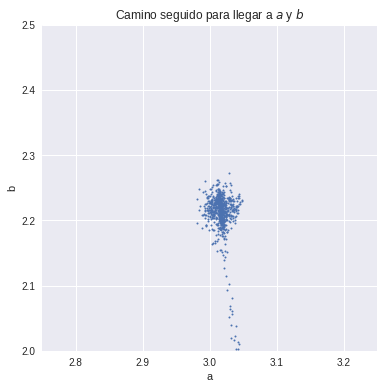

In [60]:
plt.figure(figsize = (6,6))
plt.plot(a_sample,b_sample, 'o', markersize = 2)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $a$ y $b$')
plt.grid('True')
plt.xlim(2.75, 3.25)
plt.ylim(2.0, 2.5)

In [61]:
len(a_sample)

3077

(array([  5.,  16.,  36.,  78., 153., 617.,  83.,  47.,  29.,  13.]),
 array([2.98099779, 2.98769308, 2.99438836, 3.00108364, 3.00777893,
        3.01447421, 3.0211695 , 3.02786478, 3.03456007, 3.04125535,
        3.04795064]),
 <a list of 10 Patch objects>)

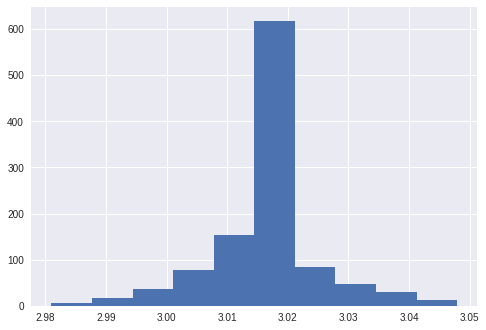

In [62]:
plt.hist(a_sample[2000::])

(array([  8.,   6.,  13.,  49., 121., 470., 296.,  88.,  21.,   5.]),
 array([2.14324139, 2.15611548, 2.16898958, 2.18186368, 2.19473778,
        2.20761187, 2.22048597, 2.23336007, 2.24623417, 2.25910826,
        2.27198236]),
 <a list of 10 Patch objects>)

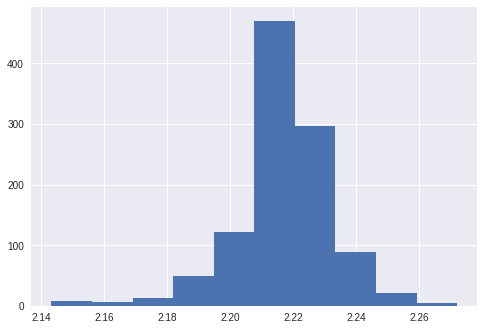

In [63]:
plt.hist(b_sample[2000::])

-------------------------------------------------

### **Múltiples caminos**

In [65]:
np.random.seed(42)

In [66]:
def modelo(theta, x):
    return theta[0]*x + theta[1]

def likelihood(theta, data): # Función que calcula el likelihood
    equis = data[0] # Llamamos x al primer conjunto de datos
    ye = data[1] # Llamamos y al segundo conjunto de datos
    model = modelo(theta,equis) # Calculamos el modelo utilizando la función modelo
    likelihood = (model**y)*np.exp(-1*(model))/factorial(ye)  # Obtenemos L
    return likelihood.prod() # Regresamos la suma de todos los L

In [84]:
a_total = []
b_total = []

rango = 20000

for k in range(10):   
    a0 = np.random.uniform(2, 4, 10)
    b0 = np.random.uniform(1, 3, 10)
    a_sample = [a0[k]]
    b_sample = [b0[k]]
    lnlike0 = likelihood([a0[k], b0[k]], [x,y])
    for j in range(1,rango):
        a_new = np.random.normal(a_sample[len(a_sample)-1], sigma)
        b_new = np.random.normal(b_sample[len(b_sample)-1], sigma)
        if a_new <= 4 and a_new >= 2.5 and b_new <= 3 and b_new >= 1: # Prior
            like = likelihood([a_new, b_new], [x,y])
            if like>lnlike0:
                lnlike0 = like
                a_sample.append(a_new)
                b_sample.append(b_new)
            elif (lnlike0/like)>(1/random.uniform(0,1)):
                lnlike0 = like
                a_sample.append(a_new)
                b_sample.append(b_new)
    a_total.append(a_sample)
    b_total.append(b_sample)

(2.0, 2.5)

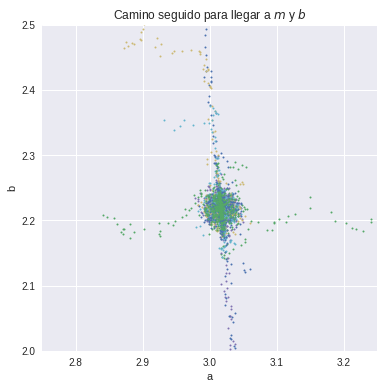

In [85]:
plt.figure(figsize = (6,6))
for k in range(10):
    plt.plot(a_total[k],b_total[k], 'o', markersize = 2)
    

plt.xlabel('a')
plt.ylabel('b')
plt.title('Camino seguido para llegar a $m$ y $b$')
plt.grid('True')
plt.xlim(2.75, 3.25)
plt.ylim(2.0, 2.5)

In [90]:
len(a_total[1])

701

(2.75, 3.25)

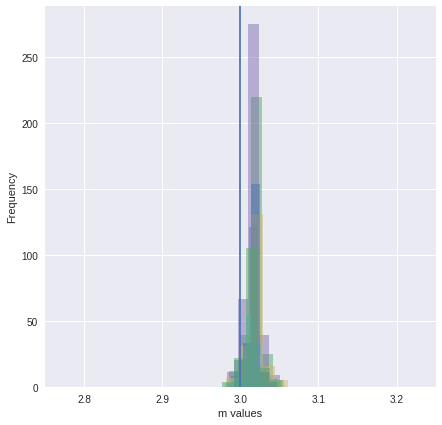

In [100]:
plt.figure(figsize = (7,7))
for i in range(10):
    plt.hist(a_total[i][400::],bins = 5,alpha = 0.5)

plt.axvline(3)
plt.xlabel('m values')
plt.ylabel('Frequency');
plt.xlim(2.75,3.25)

(2, 2.4)

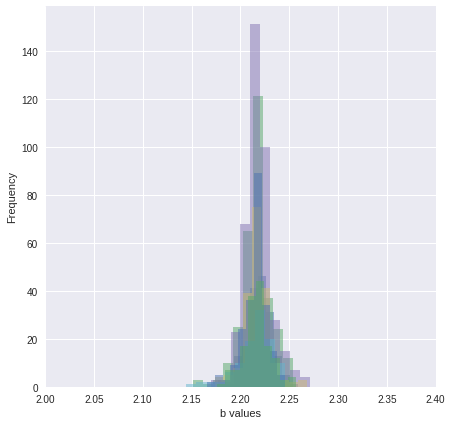

In [103]:
plt.figure(figsize = (7,7))
for i in range(10):
    plt.hist(b_total[i][400::],alpha = 0.5)

plt.axvline(3)
plt.xlabel('b values')
plt.ylabel('Frequency');
plt.xlim(2, 2.4)

Usamos el método de Gelman-Rubin para determinar si las cadenas han convergido. Referencia: https://arxiv.org/pdf/1812.09384.pdf

In [104]:
n = 10 # Número de caminos

def prom_x_i(x_it):
    return np.mean(x_it) # Promedio de un camino

def prom_mu(x_i):
    sum = 0
    for i in range(n):
        sum = sum + prom_x_i(x_i[i]) # Promedio de todos los caminos
    return sum/n

def s_i2(x_it):
    return np.std(x_it) # Desviación estándar de un camino

def s2(x_i):
    sum = 0
    for i in range(n):
        sum = sum + s_i2(x_i[i]) # Desviación estándar de todos los caminos
    return sum/n

def B_n(x_i): # Parámetro Bn
    sum = 0
    for i in range(n):
        sum = sum + (prom_x_i(x_i[i])-prom_mu(x_i))**2
    return sum/(n-1)

def sigma_gorro2(x_i, m):  
    return (m-1)*s2(x_i)/m + B_n(x_i)

def R(x_i, m): # Parámetro R
    return math.sqrt(sigma_gorro2(x_i, m)/s2(x_i))

Quitamos el burning:

In [111]:
a_new = []
b_new = []

burn = 400
for i in range(len(a_total)):
    if(len(a_total[i])>burn and len(b_total[i])>burn):
        a_new.append(a_total[i][burn:])
        b_new.append(b_total[i][burn:])

In [114]:
n = len(a_new)

In [115]:
R(a_new, len(a_new[0]))

0.9971799365188948

In [116]:
R(b_new, len(b_new[0]))

0.9971861489762414

Y son muy cercanos a 1, por lo que podemos concluir que nuestros caminos convergen a un valor.

**Calculamos las medianas.**

In [117]:
from statistics import median

In [119]:
medianaa = []

for i in range(len(a_new)):
    medianaa.append(np.median(a_new[i]))

In [120]:
medianab = []

for i in range(len(b_new)):
    medianab.append(np.median(b_new[i]))

In [121]:
aa = median(medianaa)
be = median(medianab)
print(aa, be)

3.0162341076961012 2.216937130522216


**Vemos cómo nuestros caminos convergen al mismo valor.**

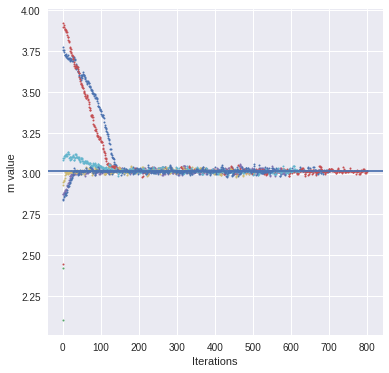

In [124]:
plt.figure(figsize = (6,6))

for i in range(1,len(a_total)):
    iteraciones = np.linspace(1, len(a_total[i]), len(a_total[i]))
    plt.plot(iteraciones, a_total[i], 'o', markersize = 2)


plt.grid('True')
plt.xlabel('Iterations')
plt.axhline(aa)
plt.ylabel('m value');

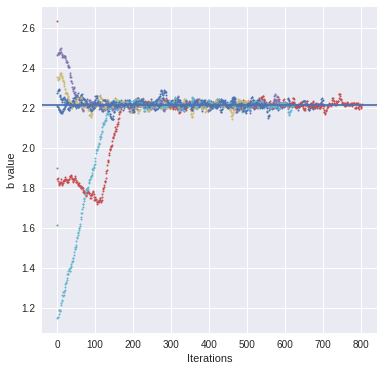

In [125]:
plt.figure(figsize = (6,6))

for i in range(1,len(b_total)):
    iteraciones = np.linspace(1, len(b_total[i]), len(b_total[i]))
    plt.plot(iteraciones, b_total[i], 'o', markersize = 2)


plt.grid('True')
plt.xlabel('Iterations')
plt.axhline(be)
plt.ylabel('b value');

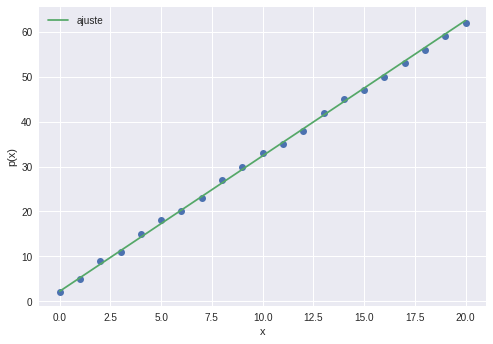

In [128]:
plt.plot(x, y, 'o')
plt.plot(x, aa*x + be, label = 'ajuste')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()

----------------------------------------

### **Funciones para E**

El modelo para este proyecto es
$\lambda = M(E,\Theta) + S(E,\eta) + B(E)$

$S$ está modelada por:
    $d\Phi/dE = N_s(E/E_p)^{-\alpha_s}$, donde $N_s$ y $\alpha_s$ son parámetros (normalización e índice espectral, respectivamente), mientras que $E_p = 4726.70MeV$ y es una energía de referencia.
    
$M$ está modelada por:
    $d\Phi/dE = N_0(E/MeV)^{-\Gamma}e^{-E/E_{cut}}$, donde $N_0$ es la normalización, $\Gamma$ es el índice espectral y $E_{cut}$ es la energía de corte. Serán tres parámetros nuevos para ajustar con nuestro  likelihood. 

**Para S**

In [141]:
def ese(N_s, a_s, E):
    E_p = 4726.70 # MeV
    return N_s*(E/E_p)**(-a_s)

Text(0, 0.5, '$d\\Phi/dE$')

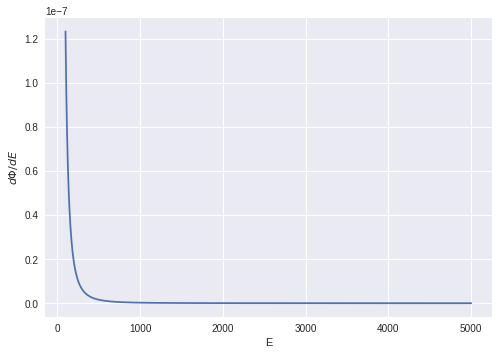

In [146]:
a_s = 2.70
N_s = 10**(-11.43)

E = np.linspace(100, 5000,2000) #MeV
S = ese(N_s,a_s,E)

plt.plot(E,S)
plt.xlabel('E')
plt.ylabel('$d\Phi/dE$')

In [147]:
def phi(N_0, gamma, E_cut, E):
    return N_0*(E)**(-gamma)*np.exp(-E/E_cut)

In [143]:
E_cut = 10**3.55
N_0 = 10**-6.89
gamma = 1.58

dphi_dE = phi(N_0, gamma, E_cut, E)

Text(0, 0.5, '$d\\Phi/dE$')

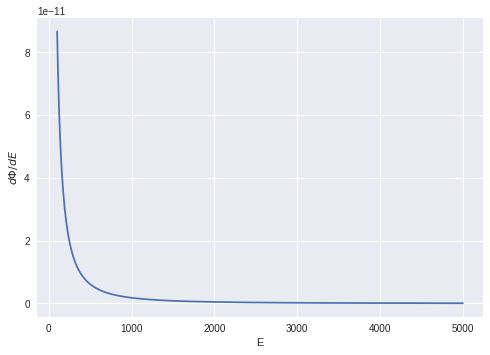

In [145]:
plt.plot(E, dphi_dE)
plt.xlabel('E')
plt.ylabel('$d\Phi/dE$')

El número de eventos esperados para la i-ésima bin de energía está dada por:
$M(E_i) = \int^{E_{i+1}}_{E_i}\int_{\Delta\Omega}d\Omega\epsilon (E) PSF(E,\Theta)d\Phi/dE$
    

Hacemos PSF y $\epsilon$ arreglos de 1's.

In [152]:
PSF = np.ones(len(E))
epsilon = np.ones(len(E))

Sabemos que $\Theta\epsilon[0,0.2^\circ]$

Y para integrar utilizamos Quad.